## Introduction to data visualization with Matplotlib

Comments outside of main course

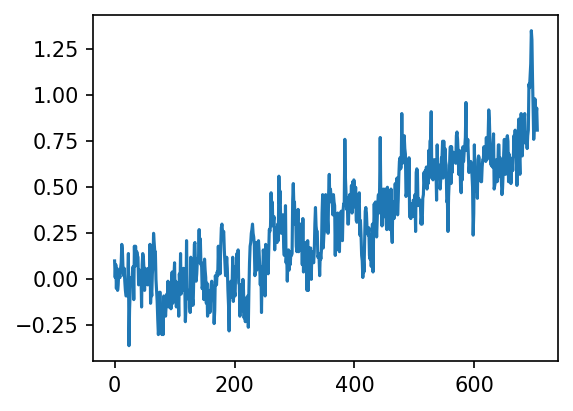

In [118]:
import matplotlib.pyplot as plt
import pandas as pd

climate_change = pd.read_csv("databases/climate_change.csv")
plt.figure(figsize=(4,3), dpi=150)  #For SIZE and QUALITY

plt.plot(climate_change.index, climate_change["relative_temp"])
plt.show()

Libraries

In [106]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Here we create a figure with empty axes (axes if everything that we see on the figure)

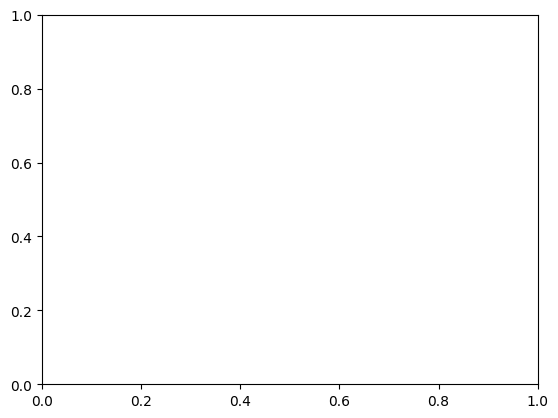

In [48]:
fig, ax = plt.subplots()
plt.show()

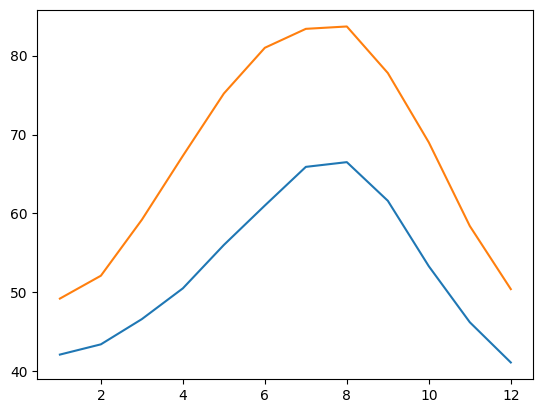

In [49]:
import pandas as pd

austin_weather = pd.read_csv("databases/austin_weather.csv")
seattle_weather = pd.read_csv("databases/seattle_weather.csv")

fig, ax = plt.subplots()
ax.plot(seattle_weather["DATE"], seattle_weather["MLY-TAVG-NORMAL"])
ax.plot(austin_weather["DATE"], austin_weather["MLY-TAVG-NORMAL"])
plt.show()

## Customization

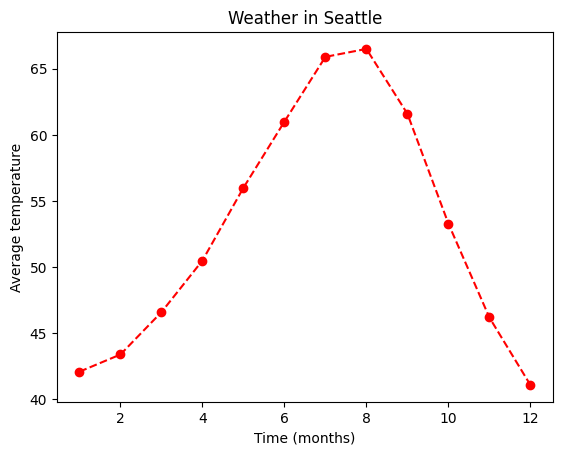

In [50]:
fig, ax = plt.subplots()

ax.plot(seattle_weather["DATE"],
        seattle_weather["MLY-TAVG-NORMAL"],
        marker="o",
        linestyle="--",
        color="r")
        #marker="v"
        #linestyle="None"

ax.set_xlabel("Time (months)")
ax.set_ylabel("Average temperature")
ax.set_title("Weather in Seattle")
plt.show()

## Small multiples (overcoming too many data)

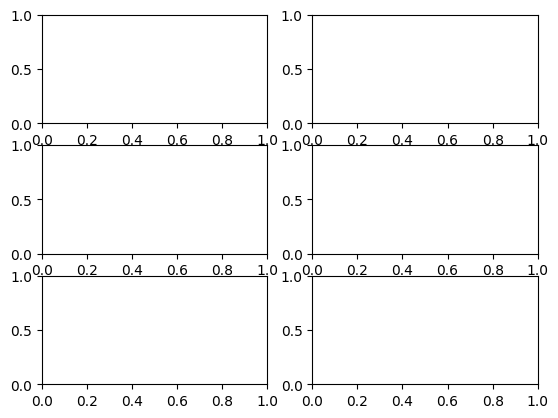

In [51]:
fig, ax = plt.subplots(3, 2) 
#creates a figure object with 3 rows of subplots and 2 columns
plt.show()

In [52]:
ax.shape

(3, 2)

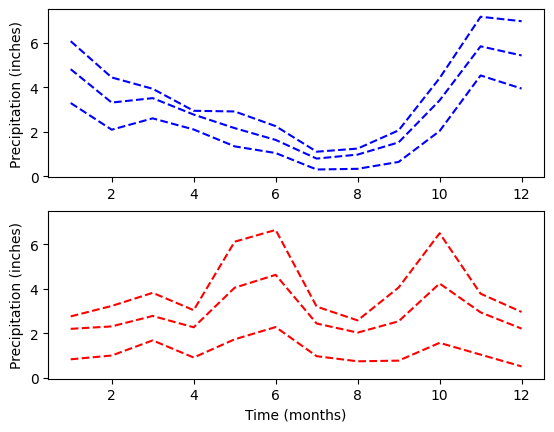

In [53]:
fig, ax = plt.subplots(2, 1, sharey=True) #all subplots have the same range of y-axis

ax[0].plot(seattle_weather["DATE"], seattle_weather["MLY-PRCP-NORMAL"],
           color="b", linestyle="--")
ax[0].plot(seattle_weather["DATE"], seattle_weather["MLY-PRCP-25PCTL"],
           color="b", linestyle="--")
ax[0].plot(seattle_weather["DATE"], seattle_weather["MLY-PRCP-75PCTL"],
           color="b", linestyle="--")

ax[1].plot(austin_weather["DATE"], austin_weather["MLY-PRCP-NORMAL"],
           color="r", linestyle="--")
ax[1].plot(austin_weather["DATE"], austin_weather["MLY-PRCP-25PCTL"],
           color="r", linestyle="--")
ax[1].plot(austin_weather["DATE"], austin_weather["MLY-PRCP-75PCTL"],
           color="r", linestyle="--")

ax[0].set_ylabel("Precipitation (inches)")
ax[1].set_ylabel("Precipitation (inches)")

ax[1].set_xlabel("Time (months)")
plt.show()

To access column we should use: ```ax[0, 0].plot(...)```

## Plotting Time-series data

In [54]:
climate_change = pd.read_csv("databases/climate_change.csv",
                            parse_dates=["date"],
                            index_col="date")
climate_change.head()

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06


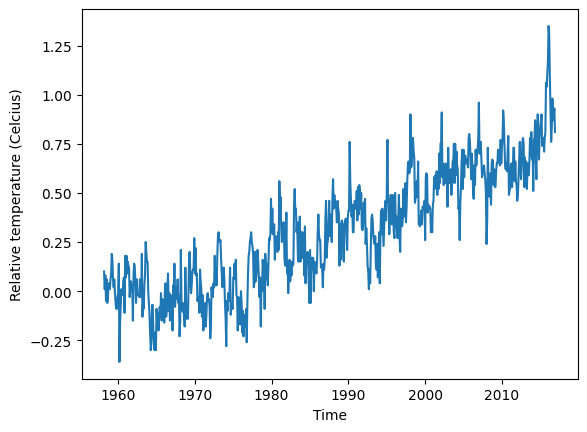

In [55]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index, climate_change["relative_temp"])

ax.set_xlabel("Time")
ax.set_ylabel("Relative temperature (Celcius)")
plt.show()

## Plotting time-series with different variables (having variables with different scales)

We have already seen how to plot such variables in different subplots, now we will see how to do it in the same subplot using two different y-axis scales

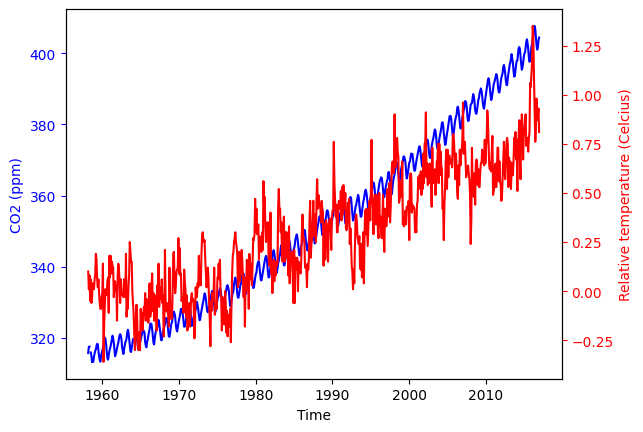

In [56]:
fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change["co2"], color="b")
ax.set_xlabel("Time")
ax.set_ylabel("CO2 (ppm)", color="b")
ax.tick_params("y", colors="b")

ax2 = ax.twinx() #share the same x-axis, but the y-axis are separate 
ax2.plot(climate_change.index, climate_change["relative_temp"], color="r")
ax2.set_ylabel("Relative temperature (Celcius)", color="r")
ax2.tick_params("y", colors="r") #!colorS!
plt.show()

Let's implement a function to use this code in the future

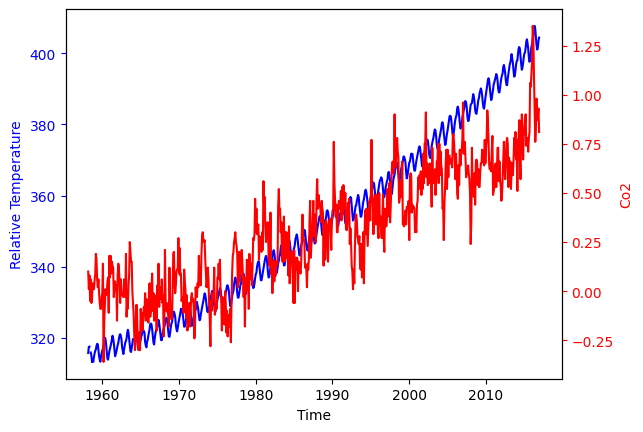

In [57]:
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color=color)
    axes.tick_params("y", colors=color) #!colorS!

fig, ax = plt.subplots()
plot_timeseries(ax, climate_change.index, climate_change["co2"],
                "b", "Time", "Relative Temperature",)

ax2 = ax.twinx()

plot_timeseries(ax2, climate_change.index, climate_change["relative_temp"],
                "r", "Time", "Co2")
plt.show()

## Annotating time-series data

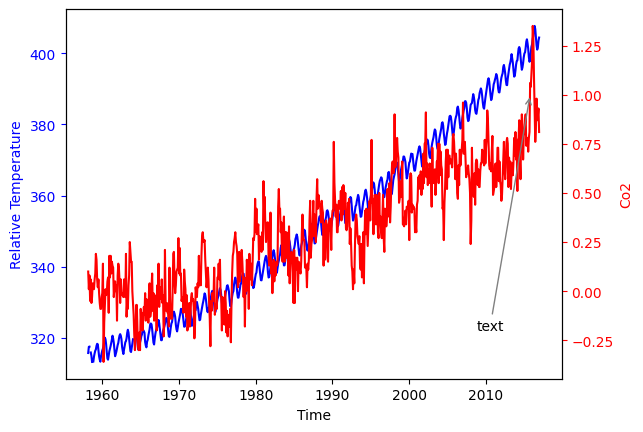

In [58]:
fig, ax = plt.subplots()
plot_timeseries(ax, climate_change.index, climate_change["co2"],
                "b", "Time", "Relative Temperature",)

ax2 = ax.twinx()

plot_timeseries(ax2, climate_change.index, climate_change["relative_temp"],
                "r", "Time", "Co2")

#FOCUS HERE#
ax2.annotate("text",
             xy=(pd.Timestamp("2015-10-06"), 1),
             xytext=(pd.Timestamp("2008-10-06"), -0.2),
             arrowprops={"arrowstyle":"->", "color":"gray"})
             #arrowprops{} - can simply use that

#FOCUS HERE#
plt.show()

## Quantitative comparisons: bar-charts

C:\Users\ANDREY\AppData\Local\Temp\ipykernel_12724\3012973802.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(medals.index, rotation=90)


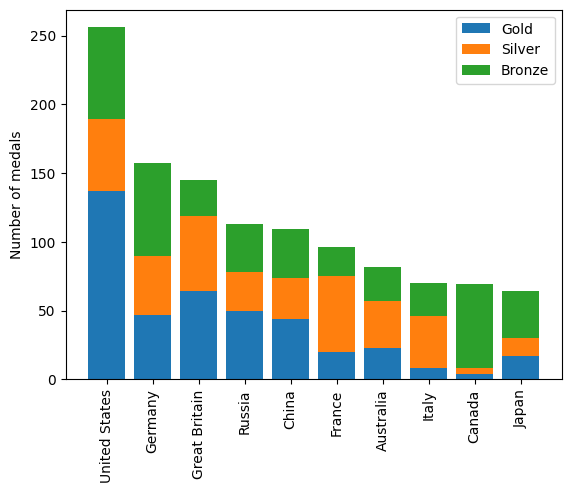

In [59]:
medals = pd.read_csv("databases/medals_by_country.csv", index_col=0)

fig, ax = plt.subplots()
ax.bar(medals.index, medals["Gold"], label="Gold")
ax.bar(medals.index, medals["Silver"], bottom=medals["Gold"], label="Silver")
ax.bar(medals.index, medals["Bronze"], bottom = medals["Gold"] + medals["Silver"], label="Bronze")

#If we want to show legend - remember to specify LABELS
ax.legend()

ax.set_ylabel("Number of medals")
ax.set_xticklabels(medals.index, rotation=90)
plt.show()

## Quantitative comparisons: histograms

Shows the distribution of values within a variable

Let's try a bar - it will show us the differnce between two groups

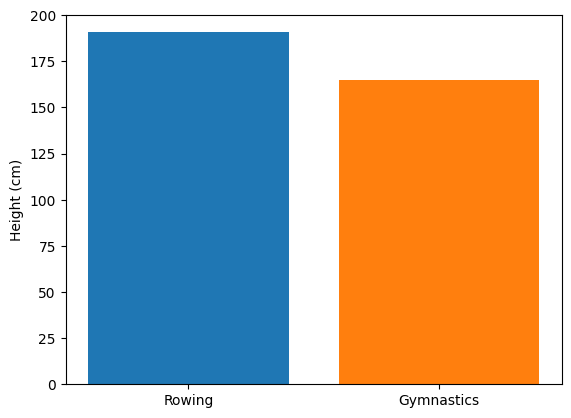

In [60]:
athletes = pd.read_csv("databases/medalist_weights.csv", index_col=0)
men_rowing = athletes[(athletes["Sport"] == "Rowing") & (athletes["Sex"] == "M")]
men_gymnastics = athletes[(athletes["Sport"] == "Gymnastics") & (athletes["Sex"] == "M")]


fig, ax = plt.subplots()

ax.bar("Rowing", men_rowing["Height"].mean())
ax.bar("Gymnastics", men_gymnastics["Height"].mean())
ax.set_ylabel("Height (cm)")
plt.show()

However the histogram is going to show is the whole distribution of groups (more detailed and helpful)

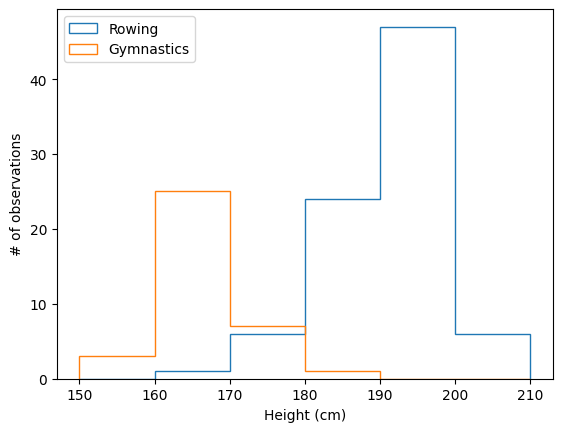

In [61]:
fig, ax = plt.subplots()
import numpy as np
ax.hist(men_rowing["Height"], label="Rowing", bins=np.linspace(150, 210, 7), histtype="step")
ax.hist(men_gymnastics["Height"], label="Gymnastics", bins=np.linspace(150, 210, 7), histtype="step")

ax.set_xlabel("Height (cm)")
ax.set_ylabel("# of observations")
#If we want to show legend - remember to specify LABELS
ax.legend()
plt.show()

## Statistical Plotting

Statistical plotting is a set of methods for using visualization to make comparisons

1.1 Adding error bars to bar chars

It is helpful as it summarises the whole distribution similar to histograms

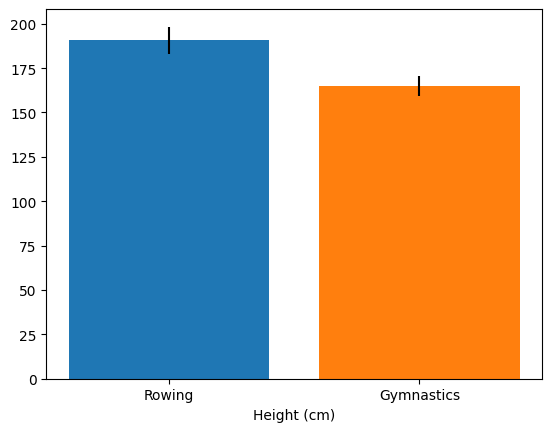

In [62]:
fig, ax = plt.subplots()

ax.bar("Rowing", 
       men_rowing["Height"].mean(),
       yerr=men_rowing["Height"].std()) #Additional vertical marker

ax.bar("Gymnastics", 
       men_gymnastics["Height"].mean(),
       yerr=men_gymnastics["Height"].std())

ax.set_xlabel("Height (cm)")
plt.show()

1.2 Adding error bars to line plots

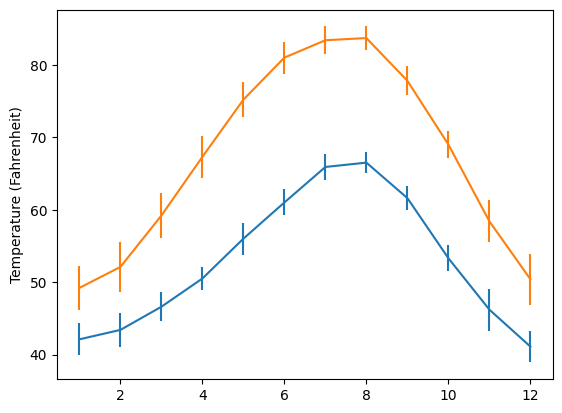

In [63]:
fig, ax = plt.subplots()

#The difference between plot and errorbar is that the last has yerr keyword

ax.errorbar(seattle_weather["DATE"],
            seattle_weather["MLY-TAVG-NORMAL"],
            yerr=seattle_weather["MLY-TAVG-STDDEV"])

ax.errorbar(austin_weather["DATE"],
            austin_weather["MLY-TAVG-NORMAL"],
            yerr=austin_weather["MLY-TAVG-STDDEV"])

ax.set_ylabel("Temperature (Fahrenheit)")

plt.show()

2.1 Adding boxplots

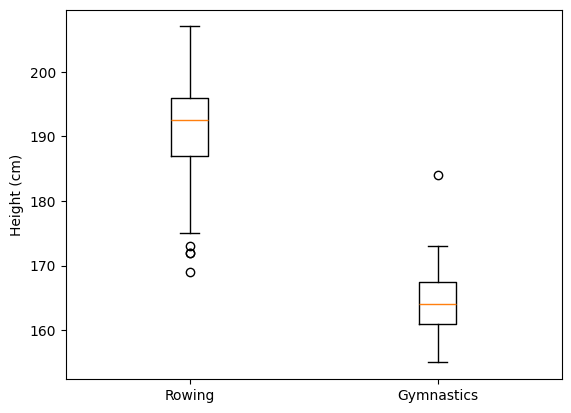

In [64]:
fig, ax = plt.subplots()

#!Notice that boxplot takes a list
ax.boxplot([men_rowing["Height"],
            men_gymnastics["Height"]])
ax.set_xticklabels(["Rowing", "Gymnastics"])
ax.set_ylabel("Height (cm)")

plt.show()

## Quantitative comparisons: scatter plots

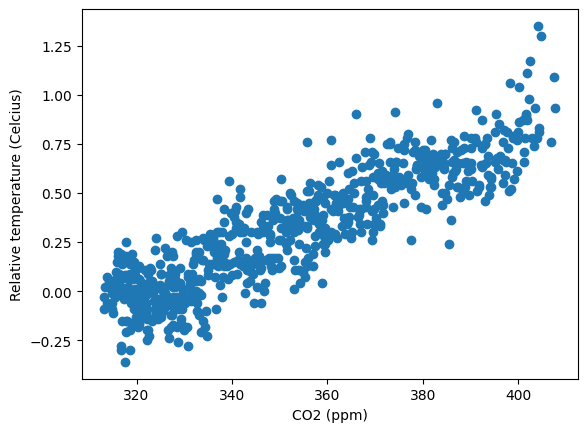

In [65]:
fig, ax = plt.subplots()
ax.scatter(climate_change["co2"], climate_change["relative_temp"])
ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (Celcius)")
plt.show()

Encoding a comparison by color

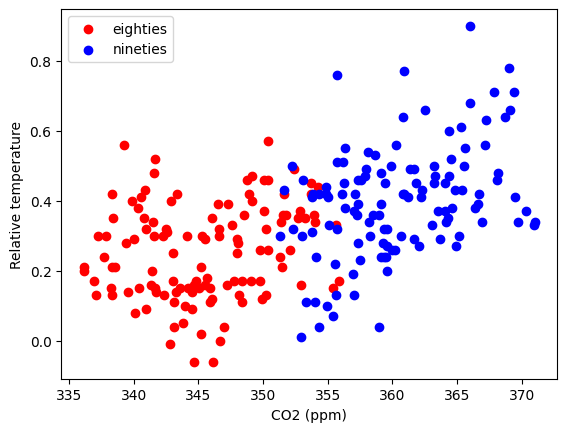

In [66]:
eighties = climate_change["1980-01-01":"1989-12-31"]
nineties = climate_change["1990-01-01":"1999-12-31"]
fig,ax = plt.subplots()

ax.scatter(eighties["co2"], eighties["relative_temp"], color="red", label="eighties")
ax.scatter(nineties["co2"], nineties["relative_temp"], color="blue", label="nineties")

ax.legend()
ax.set_ylabel("Relative temperature")
ax.set_xlabel("CO2 (ppm)")
plt.show()

Encoding a third variable by color

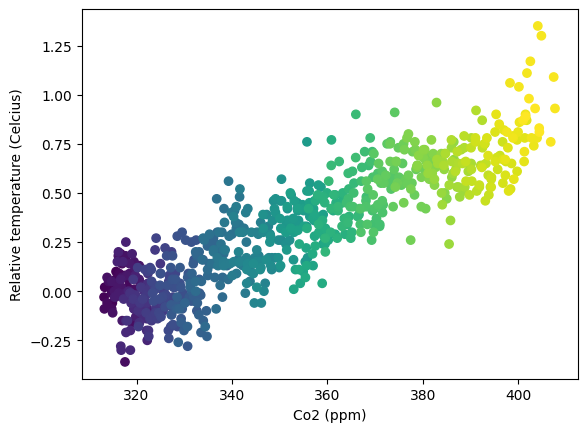

In [67]:
fig, ax = plt.subplots()
ax.scatter(climate_change["co2"], climate_change["relative_temp"],
           c=climate_change.index) #c stands for color

#Time of the measurments is encoded in the brightness of the color applied to the points 
ax.set_xlabel("Co2 (ppm)")
ax.set_ylabel("Relative temperature (Celcius)")
plt.show()


## Preparing your figures to sharing with others

Let's take on of the previous graphs and improve it's style

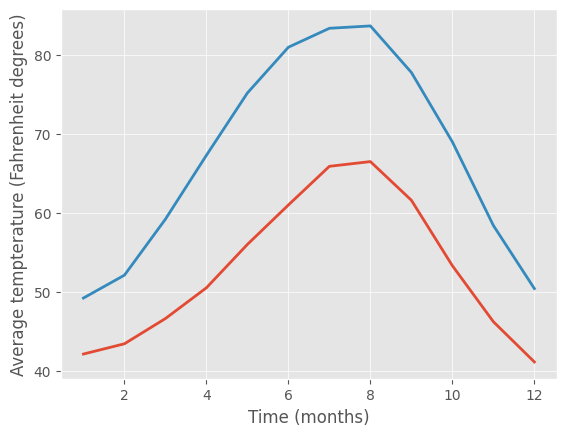

In [80]:
plt.style.use("ggplot")
#Setting this style will apply it to all the next plots 

fig, ax = plt.subplots()
ax.plot(seattle_weather["DATE"], seattle_weather["MLY-TAVG-NORMAL"])
ax.plot(austin_weather["DATE"], austin_weather["MLY-TAVG-NORMAL"])
ax.set_xlabel("Time (months)")
ax.set_ylabel("Average tempterature (Fahrenheit degrees)")
plt.show()

Example of another style

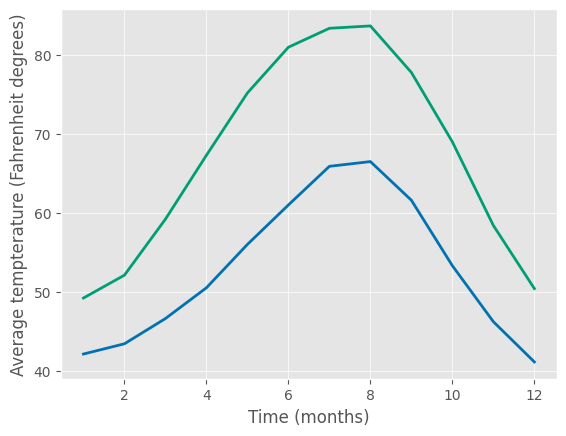

In [82]:
plt.style.use("seaborn-v0_8-colorblind")
#Setting this style will apply it to all the next plots 

fig, ax = plt.subplots()
ax.plot(seattle_weather["DATE"], seattle_weather["MLY-TAVG-NORMAL"])
ax.plot(austin_weather["DATE"], austin_weather["MLY-TAVG-NORMAL"])
ax.set_xlabel("Time (months)")
ax.set_ylabel("Average tempterature (Fahrenheit degrees)")
plt.show()

In [84]:
#To go back to default style
plt.style.use("default")

## Saving your visualizations

C:\Users\ANDREY\AppData\Local\Temp\ipykernel_12724\2119341657.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(medals.index, rotation=90)


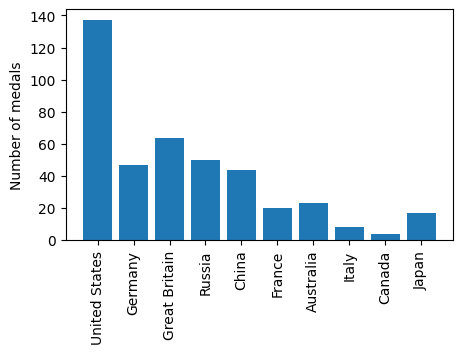

In [104]:
fig, ax = plt.subplots()

ax.bar(medals.index, medals["Gold"])
ax.set_xticklabels(medals.index, rotation=90)
ax.set_ylabel("Number of medals")

fig.set_size_inches([5,3])
fig.savefig("gold_medals.png", dpi=300)

#dpi - to control resolution
#png - image retains high quality
#jpg - for websites

## Automating figures from data

C:\Users\ANDREY\AppData\Local\Temp\ipykernel_12724\1790946930.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sports, rotation=90)


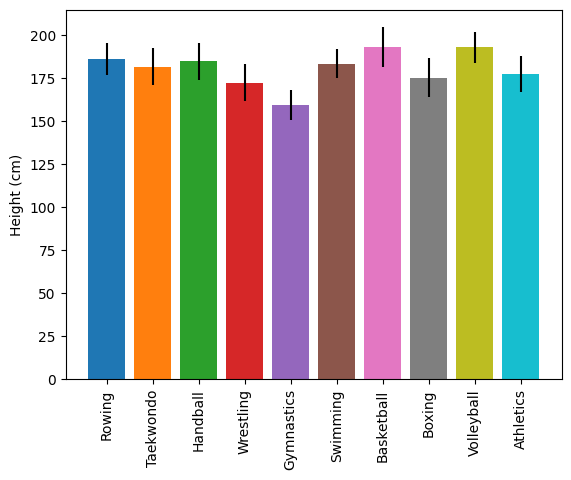

In [124]:
medals_2016 = pd.read_csv("databases/medalist_weights.csv")

sports = medals_2016["Sport"].unique()

fig, ax = plt.subplots()

for sport in sports[:10]:
    sport_df = medals_2016[medals_2016["Sport"] == sport]
    ax.bar(sport, sport_df["Height"].mean(),
           yerr=sport_df["Height"].std())

ax.set_ylabel("Height (cm)")
ax.set_xticklabels(sports, rotation=90)
plt.show()
